In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('/kaggle/input/titanic/TitanicData1.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,True,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,True,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

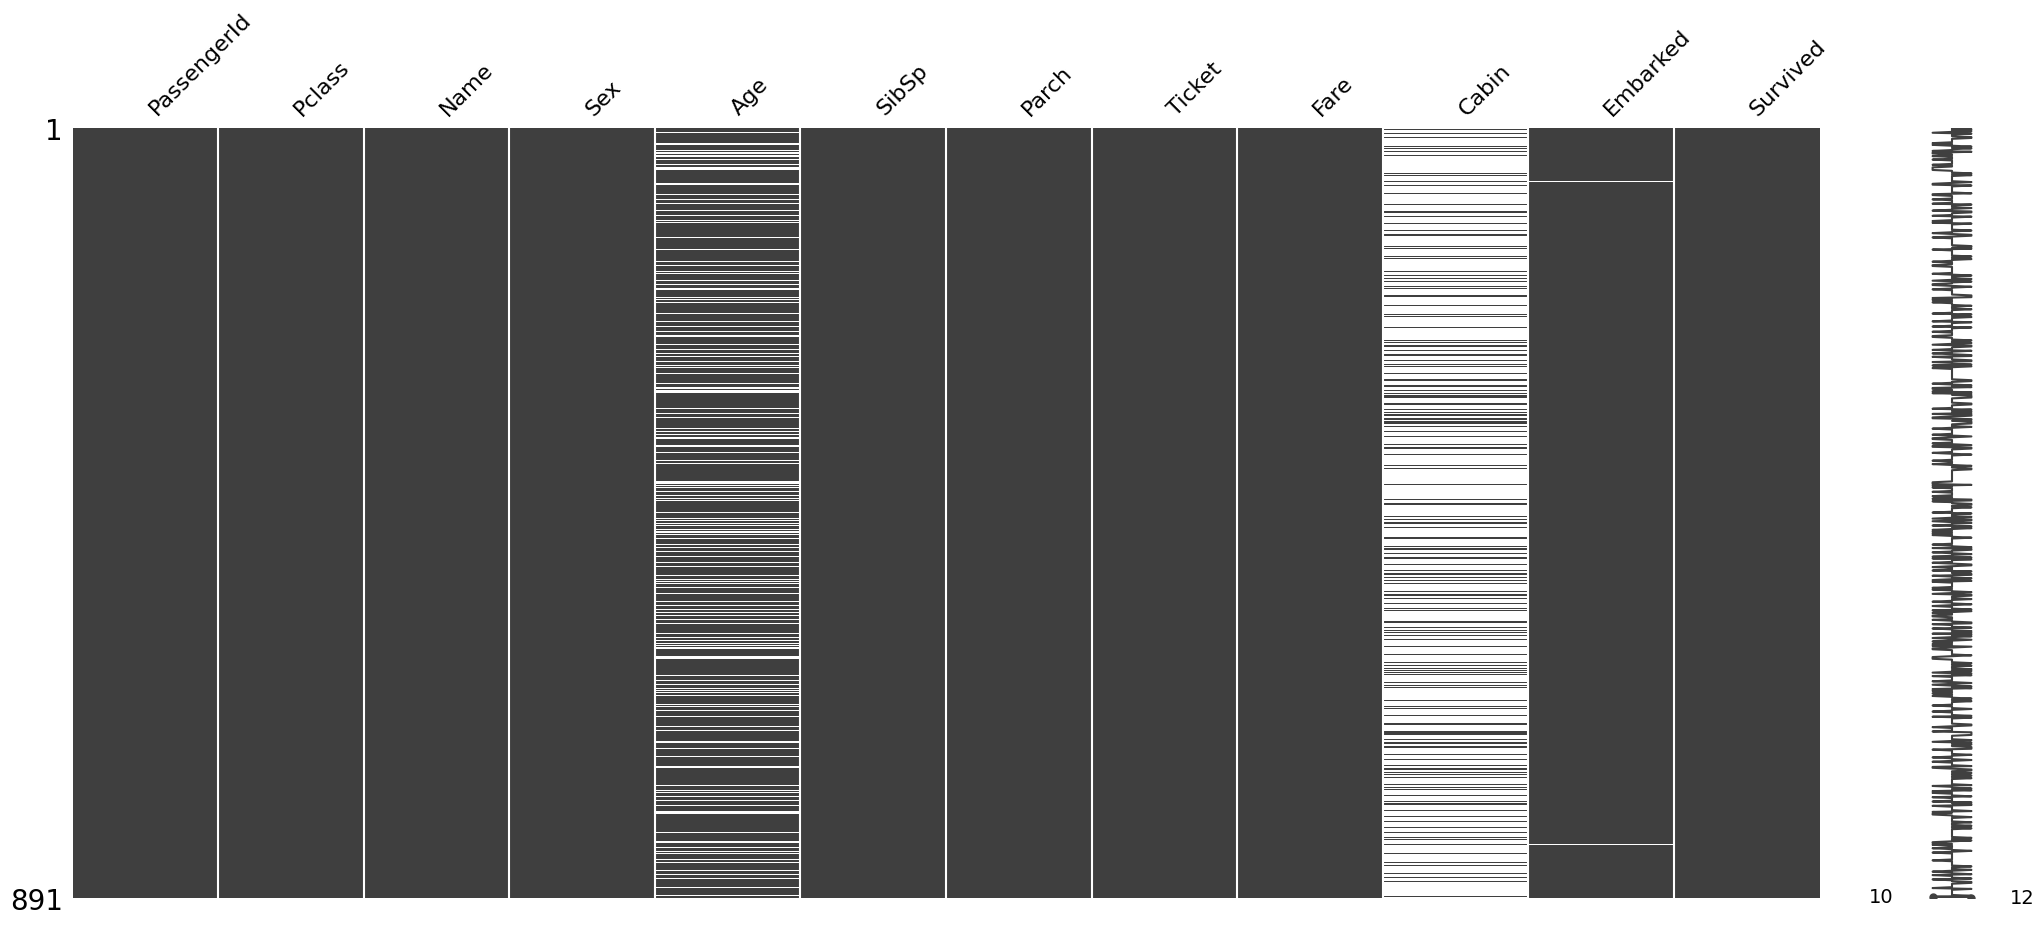

In [6]:
msno.matrix(df)

<Axes: >

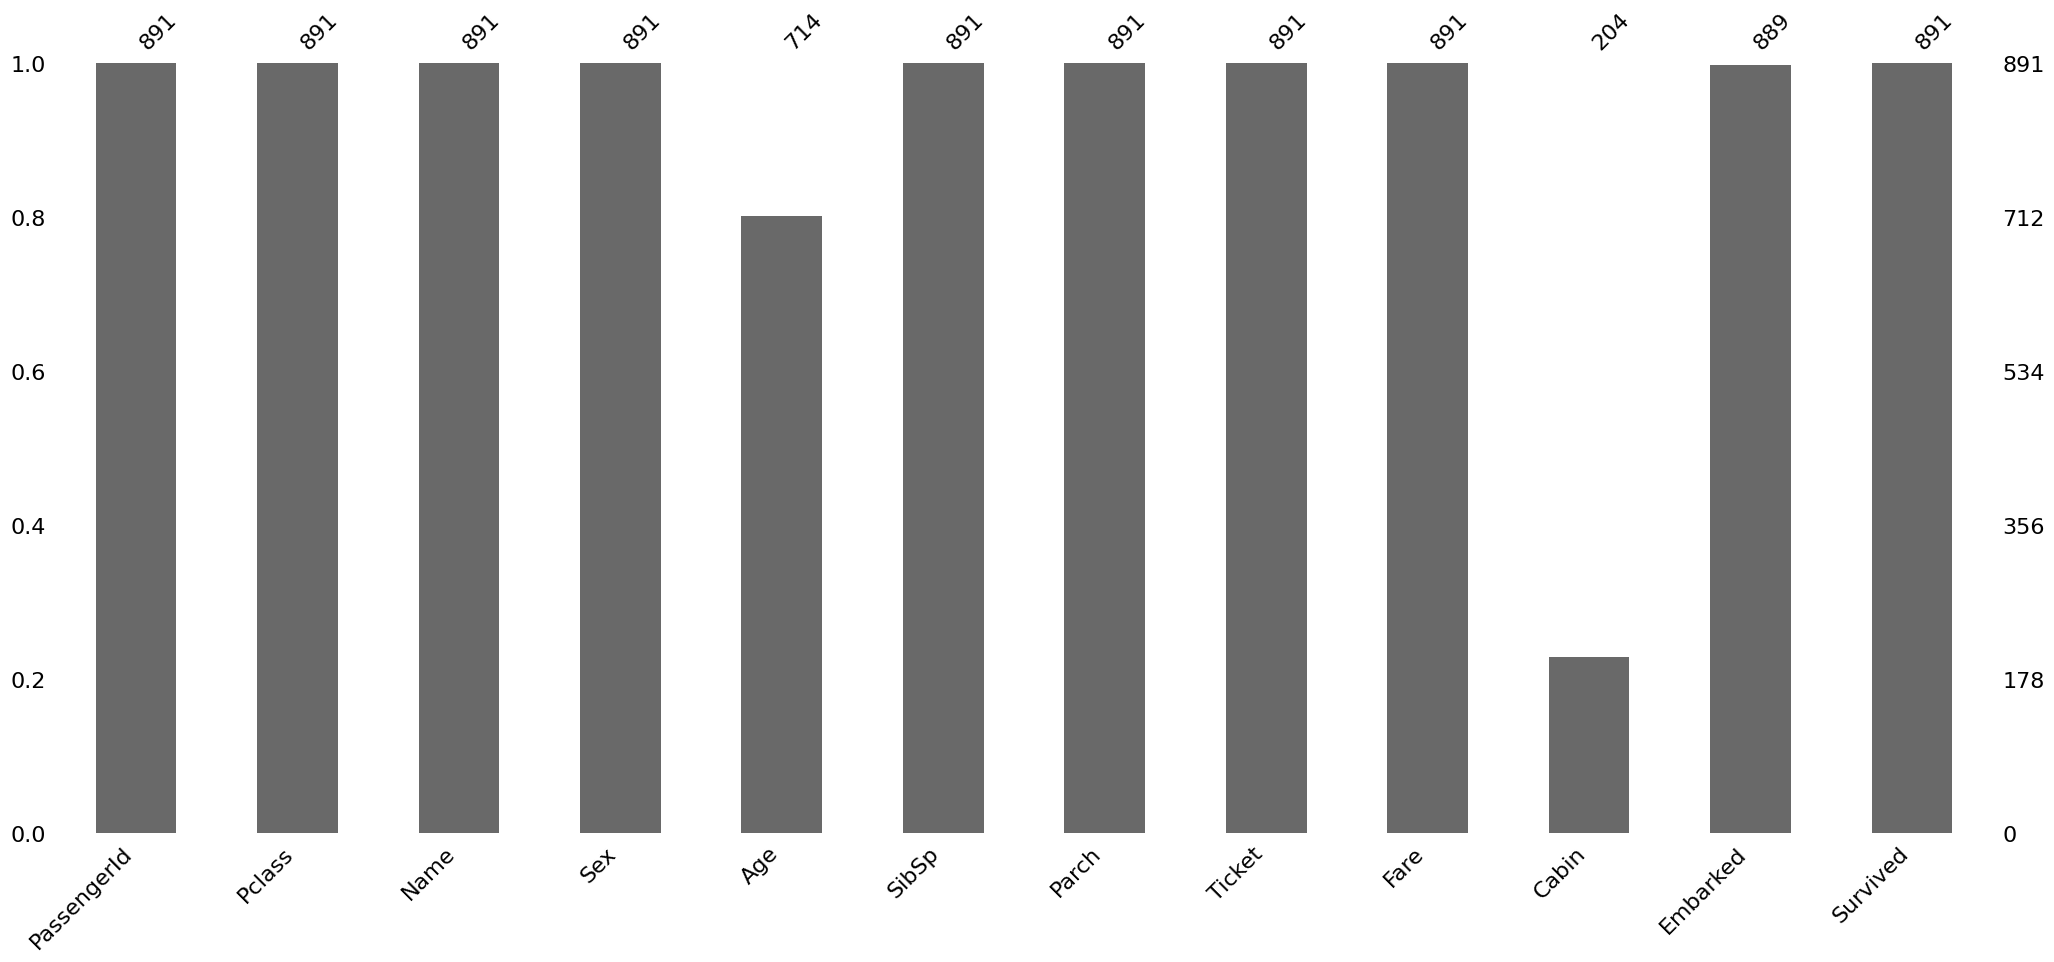

In [7]:
msno.bar(df)

In [8]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [9]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [10]:
featureList = df.columns.tolist()
print(featureList)

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']


In [11]:
temp_df = df.copy()

In [12]:
temp_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [13]:
label_encoder = LabelEncoder()

for column in temp_df.select_dtypes(include='object').columns:
    temp_df[column] = label_encoder.fit_transform(temp_df[column])

In [14]:
for column in temp_df.select_dtypes(include='object').columns:
    label_encoder.fit(temp_df[column])
    print(f"Original labels for {column}: {label_encoder.classes_}")
    print(f"Encoded labels for {column}: {label_encoder.transform(label_encoder.classes_)}\n")

In [15]:
temp_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,108,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,272,0,35.0,1,0,49,53.1000,55,2,1
4,5,3,15,1,35.0,0,0,472,8.0500,147,2,0
5,6,3,554,1,NaN,0,0,275,8.4583,147,1,0
6,7,1,515,1,54.0,0,0,85,51.8625,129,2,0
7,8,3,624,1,2.0,3,1,395,21.0750,147,2,0
8,9,3,412,0,27.0,0,2,344,11.1333,147,2,1
9,10,2,576,0,14.0,1,0,132,30.0708,147,0,1


In [16]:
temp_df.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.005007
Pclass,-0.035144,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,-0.338481
Name,-0.038559,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.057343
Sex,0.042939,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.543351
Age,0.036847,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252,-0.077221
SibSp,-0.057527,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,-0.035322
Parch,-0.001652,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.081629
Ticket,-0.056554,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,-0.164549
Fare,0.012658,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.257307
Cabin,-0.035077,0.684121,0.061959,0.096681,-0.252331,0.043593,-0.028324,0.243696,-0.503355,1.000000,0.193205,-0.254888


<Axes: >

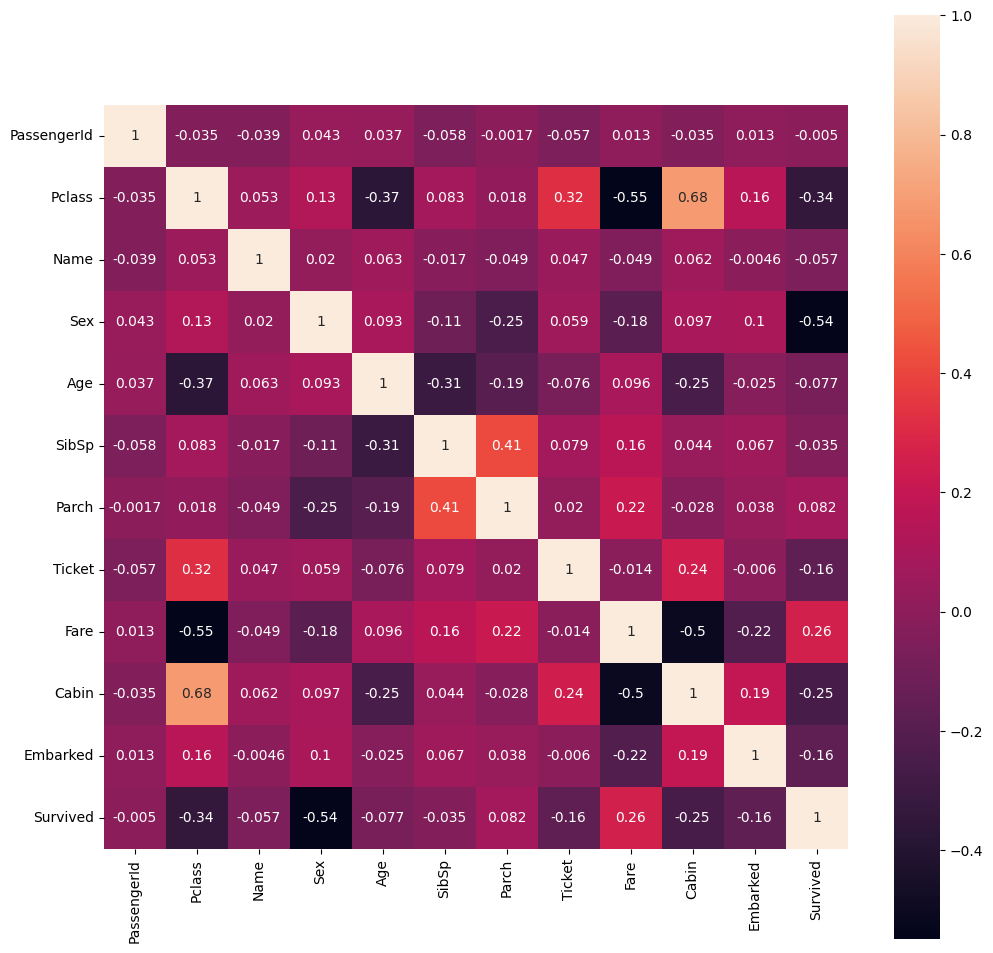

In [17]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(temp_df.corr(),vmax=1,square=True,annot=True)

LabelEncoder is used to transform the string columns ('Column1' and 'Column2') into numeric labels. After the transformation, you can create a correlation matrix using the corr() function, and then visualize it using a heatmap from the seaborn library.

In [18]:
df = df.drop('Cabin', axis=1)

In [19]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


<Axes: >

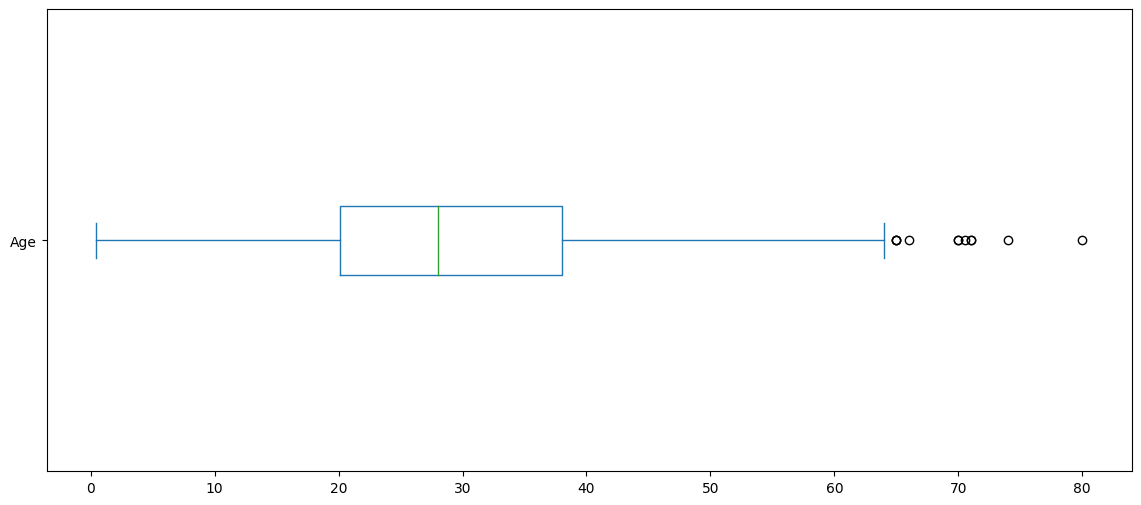

In [20]:
df['Age'].plot(kind='box', vert=False, figsize=(14,6))

After considering both mean and median, mean is ggod to go for age 

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean)

In [22]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [23]:
df = df.dropna()

In [24]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [25]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<bound method NDFrame._add_numeric_operations....,1,2,W./C. 6607,23.4500,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1
